In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
   Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)), Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=2)

Epoch 1/10
844/844 - 41s - 49ms/step - accuracy: 0.9528 - loss: 0.1601 - val_accuracy: 0.9847 - val_loss: 0.0505
Epoch 2/10
844/844 - 41s - 48ms/step - accuracy: 0.9852 - loss: 0.0479 - val_accuracy: 0.9847 - val_loss: 0.0485
Epoch 3/10
844/844 - 40s - 48ms/step - accuracy: 0.9894 - loss: 0.0332 - val_accuracy: 0.9900 - val_loss: 0.0358
Epoch 4/10
844/844 - 40s - 47ms/step - accuracy: 0.9919 - loss: 0.0237 - val_accuracy: 0.9888 - val_loss: 0.0412
Epoch 5/10
844/844 - 41s - 49ms/step - accuracy: 0.9945 - loss: 0.0175 - val_accuracy: 0.9885 - val_loss: 0.0388
Epoch 6/10
844/844 - 40s - 47ms/step - accuracy: 0.9959 - loss: 0.0132 - val_accuracy: 0.9902 - val_loss: 0.0407
Epoch 7/10
844/844 - 41s - 48ms/step - accuracy: 0.9962 - loss: 0.0112 - val_accuracy: 0.9890 - val_loss: 0.0442
Epoch 8/10
844/844 - 40s - 47ms/step - accuracy: 0.9968 - loss: 0.0095 - val_accuracy: 0.9910 - val_loss: 0.0354
Epoch 9/10
844/844 - 41s - 49ms/step - accuracy: 0.9973 - loss: 0.0077 - val_accuracy: 0.9912 - 

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 3s - 9ms/step - accuracy: 0.9891 - loss: 0.0385
Test accuracy: 0.9891


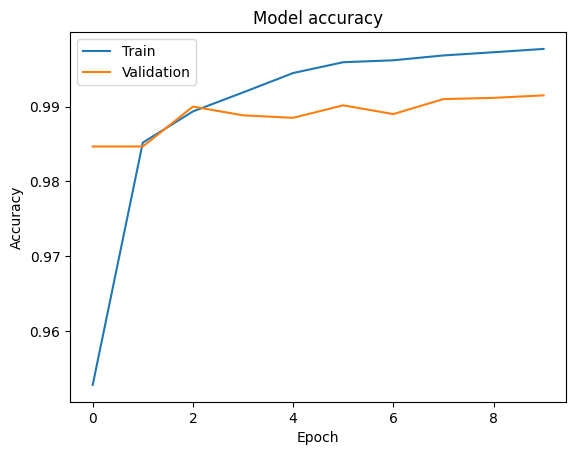

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

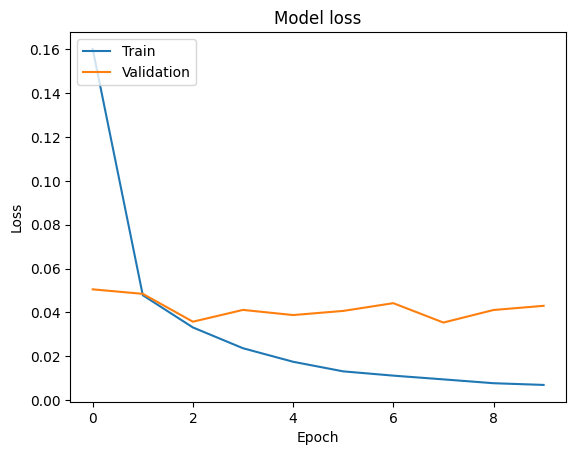

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()